# Saving the file

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
import pandas as pd  # For data handling, analysis, and manipulation
import numpy as np   # For numerical operations and array manipulation

df = pd.read_csv("/content/Dataset_with_Ebbinghaus_Retention.csv")  # Read a csv file

In [96]:
df.to_csv('/content/DATA.csv', index=False)

## If want to 'Retain' the file from grive

In [ ]:
# from google.colab import files
# files.download('/content/drive/MyDrive/forgetfulness_dataset.csv')

# Understanding Our data

```
# This is formatted as code
```



In [97]:
df.shape

(8357, 14)

In [98]:
df.head() # return first 5 rows

,subject_/topic,complexity_1-10,relevance_1-10,study_time_mins,learning_method,stress_level,sleep_hours,recall_score_1hr,recall_score_1day,recall_score_1week,days_since_learning,forgetfulness_probability_%,memory_strength,predicted_retention_%
0,Arithmetic,3,9,61,Video,5,8.2,10.0,10.0,9.0,23,3.6,5.0,1.01
1,Algebra,6,8,89,Video,7,6.9,10.0,9.2,8.0,9,19.0,5.0,16.53
2,Advanced Algebra,7,7,94,Video,7,7.7,10.0,10.0,9.0,13,6.3,5.0,7.43
3,Abstract Algebra,9,6,125,Practical,6,7.2,10.0,9.8,9.2,23,7.1,5.0,1.01
4,Geometry,5,8,83,Text,10,7.3,10.0,9.9,9.2,13,0.3,5.0,7.43


# Step1 : Data Processing

In [99]:
df.info(memory_usage='deep')  # checking the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8357 entries, 0 to 8356
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   subject_/topic               8357 non-null   object 
 1   complexity_1-10              8357 non-null   int64  
 2   relevance_1-10               8357 non-null   int64  
 3   study_time_mins              8357 non-null   int64  
 4   learning_method              8357 non-null   object 
 5   stress_level                 8357 non-null   int64  
 6   sleep_hours                  8357 non-null   float64
 7   recall_score_1hr             8357 non-null   float64
 8   recall_score_1day            8357 non-null   float64
 9   recall_score_1week           8357 non-null   float64
 10  days_since_learning          8357 non-null   int64  
 11  forgetfulness_probability_%  8357 non-null   float64
 12  memory_strength              8357 non-null   float64
 13  predicted_retentio

In [100]:
df.isnull().sum() # check any null value

,0
subject_/topic,0
complexity_1-10,0
relevance_1-10,0
study_time_mins,0
learning_method,0
stress_level,0
sleep_hours,0
recall_score_1hr,0
recall_score_1day,0
recall_score_1week,0


In [101]:
df.duplicated().sum()  # check duplicate value

np.int64(0)

In [102]:
df.describe() # Checking Mathematically

,complexity_1-10,relevance_1-10,study_time_mins,stress_level,sleep_hours,recall_score_1hr,recall_score_1day,recall_score_1week,days_since_learning,forgetfulness_probability_%,memory_strength,predicted_retention_%
count,8357.000000,8357.000000,8357.000000,8357.000000,8357.000000,8357.000000,8357.000000,8357.000000,8357.000000,8357.000000,8357.000000,8357.000000
mean,6.112122,7.052052,90.539428,6.050138,7.658083,9.988429,9.823238,8.818942,18.649515,11.835443,4.986776,5.399051
std,1.994066,1.438060,20.520239,2.253076,0.794720,0.116583,0.290063,0.414735,6.866281,6.298845,0.133238,6.542993
min,3.000000,5.000000,43.000000,1.000000,5.100000,6.500000,6.700000,5.700000,7.000000,0.000000,1.000000,0.000000
25%,4.000000,6.000000,73.000000,4.000000,7.100000,10.000000,9.700000,8.600000,13.000000,7.500000,5.000000,0.670000
50%,6.000000,7.000000,91.000000,6.000000,7.700000,10.000000,10.000000,8.900000,19.000000,11.600000,5.000000,2.240000
75%,8.000000,8.000000,108.000000,8.000000,8.300000,10.000000,10.000000,9.100000,25.000000,15.900000,5.000000,7.430000
max,10.000000,10.000000,136.000000,10.000000,9.000000,10.000000,10.000000,10.000000,30.000000,43.200000,5.000000,24.660000


In [103]:
df.corr(numeric_only=True)["forgetfulness_probability_%"] # checking correlation

,forgetfulness_probability_%
complexity_1-10,0.040621
relevance_1-10,0.036708
study_time_mins,0.036153
stress_level,0.101043
sleep_hours,-0.098065
recall_score_1hr,-0.151037
recall_score_1day,-0.447059
recall_score_1week,-0.629213
days_since_learning,-0.001002
forgetfulness_probability_%,1.000000


# Generating Report via 'Pandas Profiling'

In [22]:
from ydata_profiling import ProfileReport   # !pip install ydata_profiling
prof = ProfileReport(df)
prof.to_file("our_data_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 35.41it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Step 2: EDA (Exploratory Data Enalysis)

In [156]:
# Importing basic libraries for data handling and plotting
import pandas as pd
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # plotting difft type of graph

In [157]:
# Getting correlation of all numeric features with the target column
correlation_with_target = df.corr(numeric_only=True)["forgetfulness_probability_%"].sort_values(
    key=abs, ascending=False
)

<ipython-input-158-891ab71c42ff>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


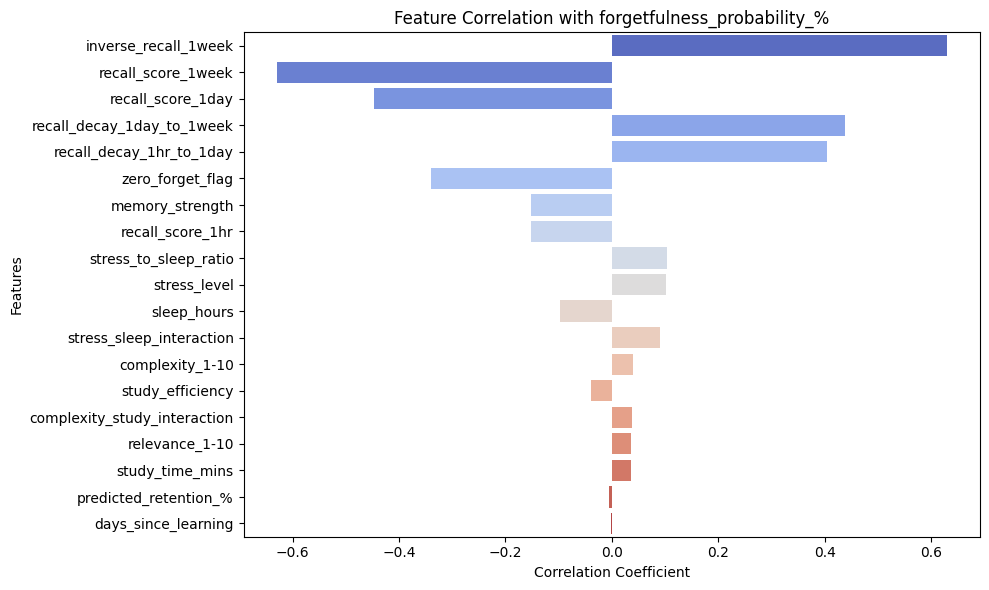

In [158]:
# Set plot size
plt.figure(figsize=(10, 6))

# Plotting horizontal barplot of feature correlations (excluding target itself)
sns.barplot(
    x=correlation_with_target.drop("forgetfulness_probability_%").values,
    y=correlation_with_target.drop("forgetfulness_probability_%").index,
    palette="coolwarm"
)

# Add plot title and axis labels
plt.title("Feature Correlation with forgetfulness_probability_%")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")

# Make sure layout fits well
plt.tight_layout()

# Show the plot
plt.show()

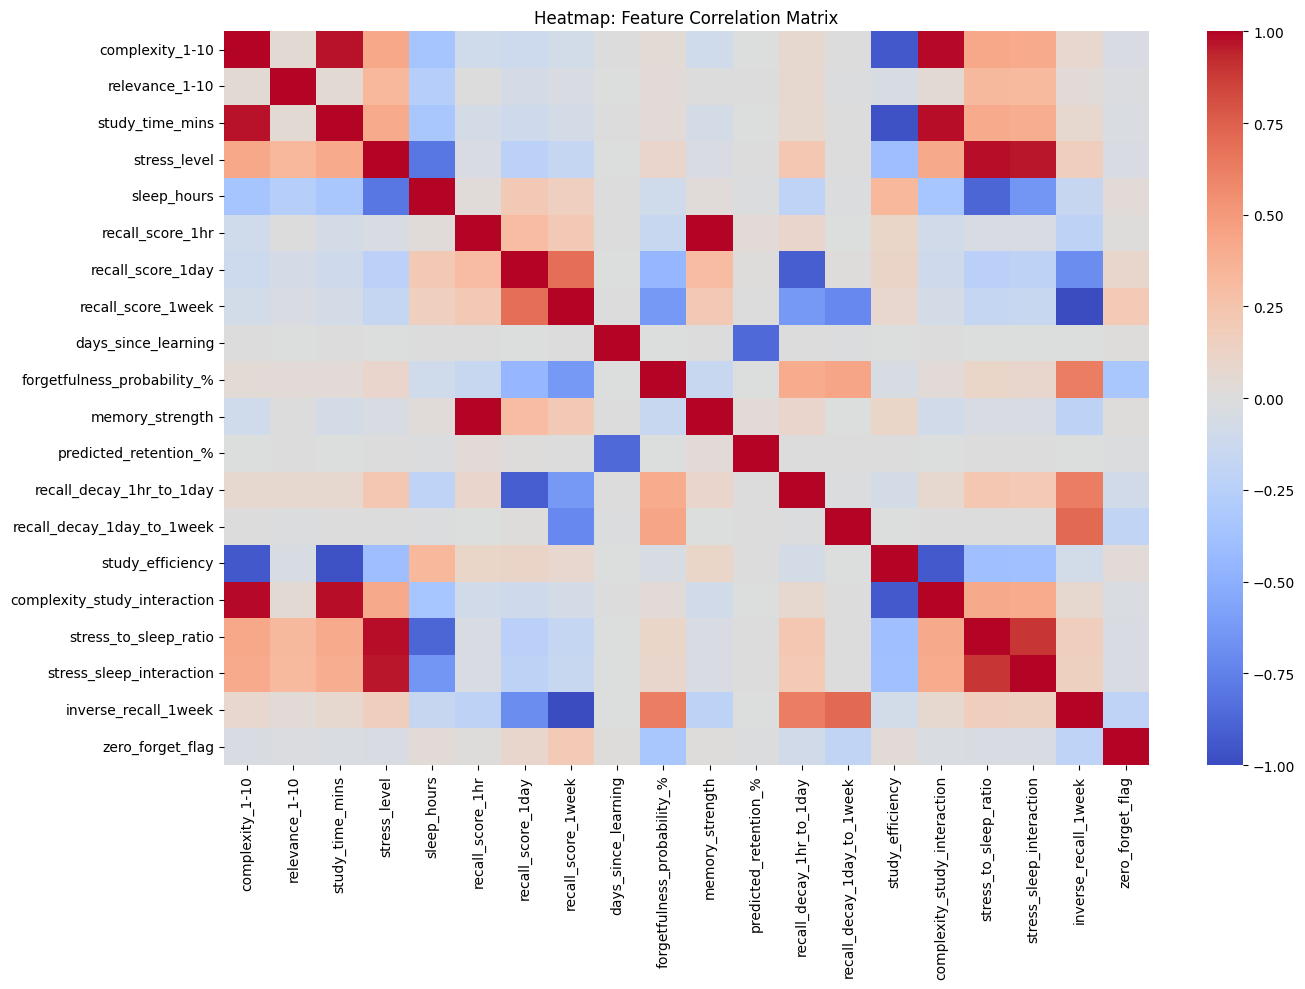

In [159]:
# Set the size of the heatmap figure
plt.figure(figsize=(14, 10))

sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm', fmt='.2f')

plt.title("Heatmap: Feature Correlation Matrix")    # Add a title to the heatmap
plt.tight_layout()                                  # Adjust layout to avoid overlap

# Show the final plot
plt.show()


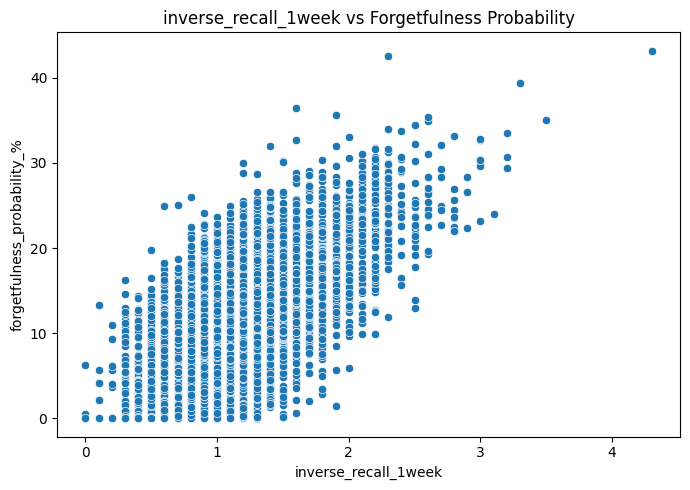

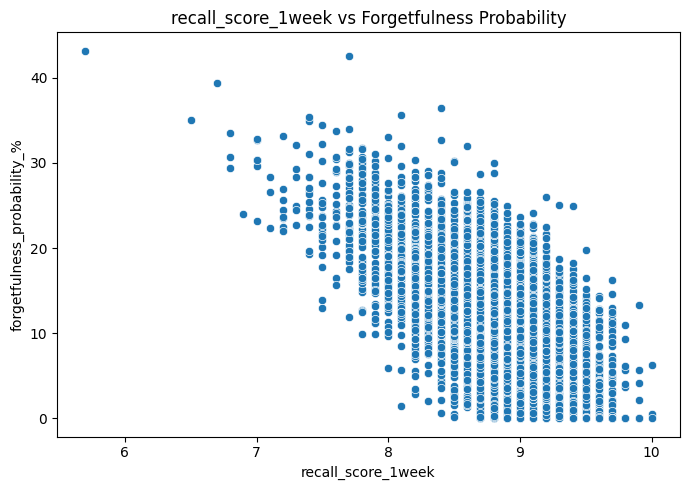

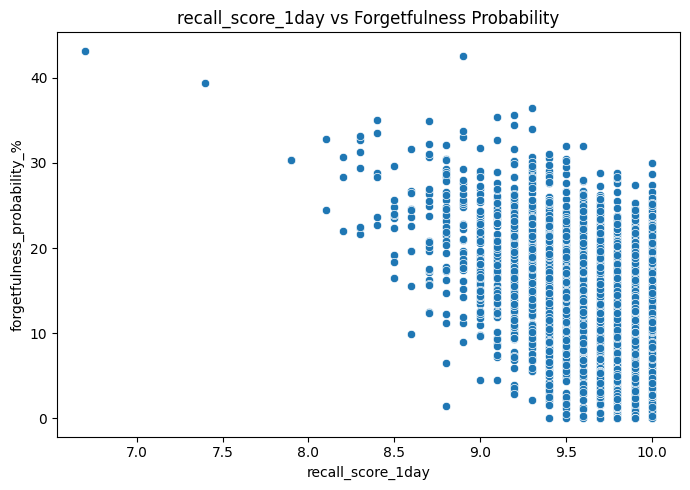

In [160]:
# Top 3 correlations
top_3_features = correlation_with_target.index[1:4]  # Get the top 3 features (excluding the target itself)

for feature in top_3_features:
    plt.figure(figsize=(7, 5))  # Set the size for each scatter plot
    sns.scatterplot(x=df[feature], y=df["forgetfulness_probability_%"])  # Plot feature vs target
    plt.title(f"{feature} vs Forgetfulness Probability")  # Set the plot title
    plt.tight_layout()  # Adjust layout
    plt.show()  # Display the plot


# Step 3: Feature Engineering

In [161]:
# adding memory delay feature
df["recall_decay_1hr_to_1day"] = df["recall_score_1hr"] - df["recall_score_1day"]  # drop in recall after 1 day
df["recall_decay_1day_to_1week"] = df["recall_score_1day"] - df["recall_score_1week"]  # drop from 1 day to 1 week

# study efficiency & interactions
df["study_efficiency"] = df["recall_score_1hr"] / df["study_time_mins"]  # how much was remembered per minute studied
df["complexity_study_interaction"] = df["complexity_1-10"] * df["study_time_mins"]  # complex topics + time spent

# 'stress' vs 'sleep' relationships
df["stress_to_sleep_ratio"] = df["stress_level"] / df["sleep_hours"]  # balance between stress and rest
df["stress_sleep_interaction"] = df["stress_level"] * df["sleep_hours"]  # combined effect of stress and sleep
df["stress_squared"] = df["stress_level"] ** 2  # for nonlinear patterns
df["sleep_squared"] = df["sleep_hours"] ** 2  # squared sleep for curve behavior

# 'decay' x 'study' effort
df["decay_x_study"] = df["recall_decay_1day_to_1week"] * df["study_time_mins"]  # effort vs. memory drop

# inverse recall as forgetfulness signal
df["inverse_recall_1week"] = 10 - df["recall_score_1week"]  # low recall = high forgetfulness

# FLAG FOR ZERO FORGETFULNESS
df["zero_forget_flag"] = (df["forgetfulness_probability_%"] == 0).astype(int)  # 1 if no forgetfulness at all

In [162]:
df.drop(columns=["stress_squared", "sleep_squared", "decay_x_study"], inplace=True)  # removed some feature for higher Accuracy

##  After Feature Engineering

<ipython-input-163-bc1780bbb825>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


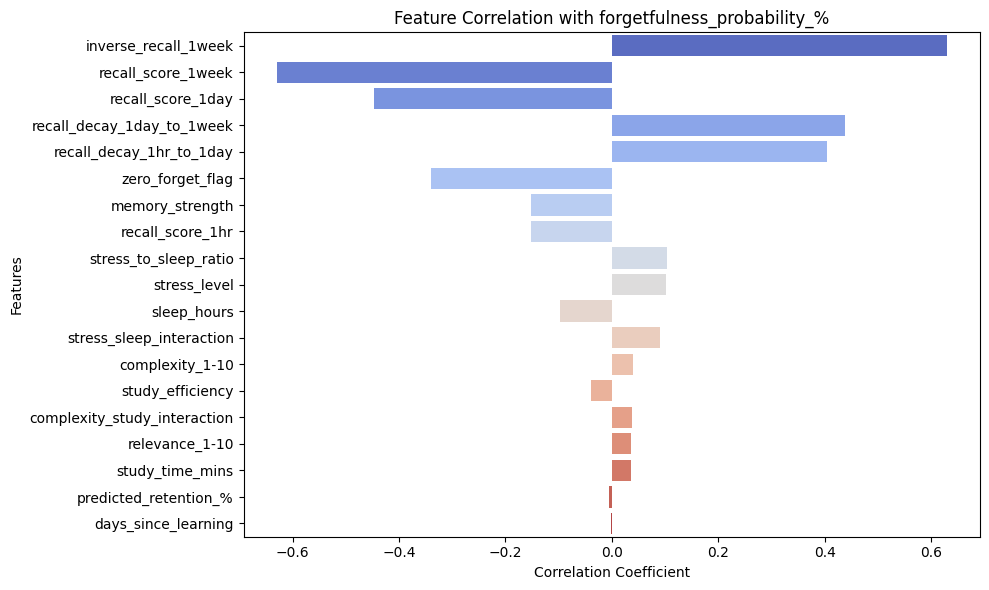

In [163]:
import pandas as pd  # for handling data
import seaborn as sns  # for visualizations
import matplotlib.pyplot as plt  # for plotting

# Get correlation values with the target, sorted by strength (absolute value)
target_corr = df.corr(numeric_only=True)["forgetfulness_probability_%"].sort_values(
    key=abs, ascending=False
)

# Set plot size
plt.figure(figsize=(10, 6))

# Bar plot of feature correlations (excluding the target itself)
sns.barplot(
    x=target_corr.drop("forgetfulness_probability_%").values,  # correlation values
    y=target_corr.drop("forgetfulness_probability_%").index,   # feature names
    palette="coolwarm"  # color scale for better visual contrast
)

# Add plot labels and title
plt.title("Feature Correlation with forgetfulness_probability_%")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")

# Adjust layout so nothing gets cut off
plt.tight_layout()

# Show the final plot
plt.show()

# Building The Model

In [164]:
from sklearn.pipeline import Pipeline  # for chaining preprocessing + model steps
from sklearn.compose import ColumnTransformer  # to apply different preprocessing to different columns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer  # encoding + scaling
from sklearn.model_selection import train_test_split  # to split data into train/test sets
from xgboost import XGBRegressor  # the regression model (gradient boosting)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # evaluation metrics
import numpy as np  # for numerical operations


In [165]:
# Separate features and target
X = df.drop(columns=["forgetfulness_probability_%"])  # all features except the target
y = np.log1p(df["forgetfulness_probability_%"])  # apply log transform to target for better modeling

# Frequency encoding for high-cardinality feature
X["subject_topic_freq"] = X["subject_/topic"].map(X["subject_/topic"].value_counts(normalize=True))  # encode based on frequency
X.drop(columns=["subject_/topic"], inplace=True)  # drop original column after encoding

# One-hot encoding for low-cardinality categorical feature
X = pd.get_dummies(X, columns=["learning_method"], drop_first=True)  # one-hot encode and drop first to avoid dummy trap


In [166]:
# Select all numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns  # get numeric feature names

# Standardize the numerical features
scaler = StandardScaler()  # initialize the scaler
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])  # apply scaling to numeric columns

In [168]:
scaler = StandardScaler()  # create scaler to normalize numerical data
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])  # apply scaling to numerical columns

In [169]:
X.shape

(8357, 23)

In [170]:
y.shape

(8357,)

# Train-text-split

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split data into train and test (80/20)

In [172]:
from xgboost import XGBRegressor  # gradient boosting model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # metrics for evaluation

In [173]:
# Step 1: Define the XGBoost regressor with tuned hyperparameters
model = XGBRegressor(
    n_estimators=300,         # number of trees
    max_depth=6,              # max depth of each tree
    learning_rate=0.05,       # step size shrinkage
    subsample=0.9,            # sample ratio for training rows
    colsample_bytree=0.8,     # sample ratio for features
    random_state=42           # for reproducibility
)

In [174]:
# Step 2: Train the model
model.fit(X_train, y_train)  # fit model to training data

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [175]:
# Predict on test set
y_pred = model.predict(X_test)  # make predictions on test data

# Convert predictions and actual values back to original scale
y_pred_original = np.expm1(y_pred)       # reverse log1p transform for predictions
y_test_original = np.expm1(y_test)

In [176]:
# Step 4: Evaluate on original scale
r2 = r2_score(y_test_original, y_pred_original)  # R-squared score

# Calculate RMSE manually
mse = mean_squared_error(y_test_original, y_pred_original)  # mean squared error
rmse = np.sqrt(mse)  # root mean squared error

mae = mean_absolute_error(y_test_original, y_pred_original)  # mean absolute error

# Print results
print("Model Evaluation:")
print(f"R² Score     : {r2:.4f}")
print(f"RMSE         : {rmse:.4f}")
print(f"MAE          : {mae:.4f}")

Model Evaluation:
R² Score     : 0.3871
RMSE         : 4.9613
MAE          : 3.9382


## RESULT

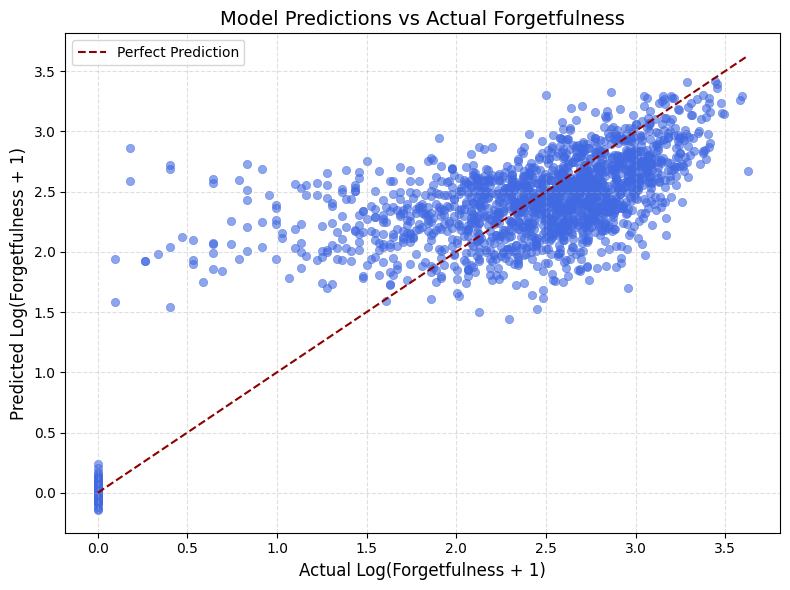

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Actual vs. Predicted (in log scale since we predicted on transformed data)
plt.figure(figsize=(8, 6))

# Plot predicted vs actual values (log-transformed)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="royalblue", edgecolor=None)

# Add reference line for perfect prediction
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--',
    color='darkred',
    label='Perfect Prediction'
)
# Set axis labels and title
plt.xlabel("Actual Log(Forgetfulness + 1)", fontsize=12)
plt.ylabel("Predicted Log(Forgetfulness + 1)", fontsize=12)
plt.title("Model Predictions vs Actual Forgetfulness", fontsize=14)

# Optional: add grid and legend
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

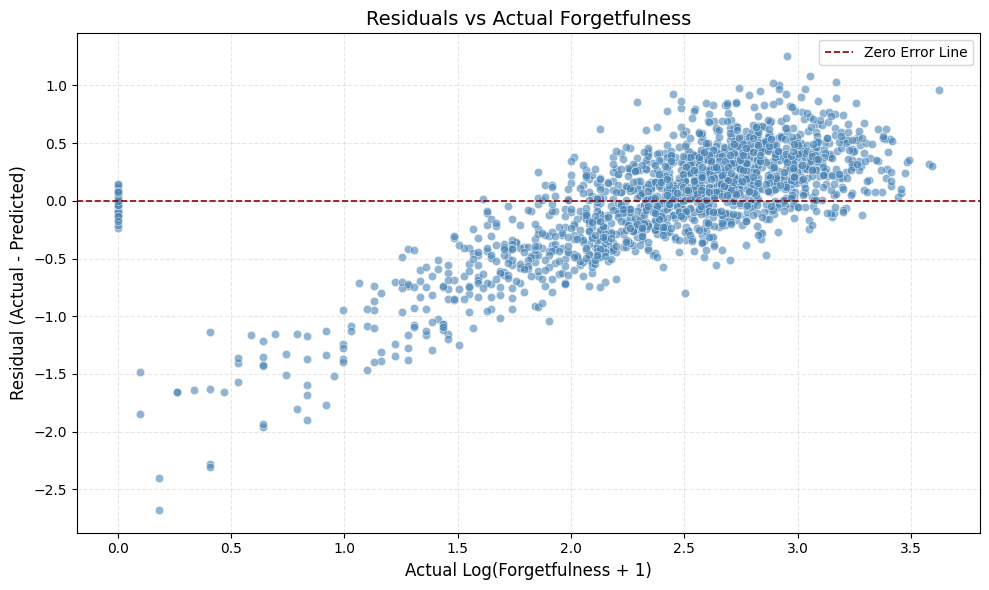

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate residuals (errors between actual and predicted values)
residuals = y_test - y_pred  # on log scale

# Step 2: Plot residuals vs actual values
plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=residuals, alpha=0.6, color='steelblue')  # plot residuals
plt.axhline(0, color='darkred', linestyle='--', linewidth=1.2, label="Zero Error Line")  # reference line at 0

# Axis labels and title
plt.xlabel("Actual Log(Forgetfulness + 1)", fontsize=12)
plt.ylabel("Residual (Actual - Predicted)", fontsize=12)
plt.title("Residuals vs Actual Forgetfulness", fontsize=14)

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# HyperParameter Tuning to 'improve model Performance'

In [181]:
from xgboost import XGBRegressor  # XGBoost regressor
from sklearn.model_selection import GridSearchCV  # for hyperparameter tuning
from sklearn.metrics import make_scorer, r2_score  # custom scoring
import numpy as np

In [182]:
# Define the base model
model = XGBRegressor(random_state=42, verbosity=0)  # base XGBoost model

In [183]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200],        # number of trees
    'max_depth': [4, 6],               # tree depth
    'learning_rate': [0.1, 0.05],      # step size
    'subsample': [0.8, 0.9],           # row sampling
    'colsample_bytree': [0.7, 0.9]     # feature sampling
}

In [184]:
# Use R² score as the evaluation metric
scorer = make_scorer(r2_score)

# Set up grid search with 3-fold cross-validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,                     # 3-fold CV
    scoring=scorer,          # use R² as the metric
    verbose=1,               # print progress
    n_jobs=-1                # use all CPU cores
)

In [185]:
# Fit the model to training data
grid_search.fit(X_train, y_train)

# Show best hyperparameters and R² score from grid search
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

# Retrieve the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
Best R² Score: 0.5551575776990866


In [186]:
# Evaluate performance on the test set
from sklearn.metrics import mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)  # final R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # final RMSE
mae = mean_absolute_error(y_test, y_pred)  # final MAE

# Print results
print("\nFinal Model Evaluation:")
print(f"R² Score     : {r2:.4f}")
print(f"RMSE         : {rmse:.4f}")
print(f"MAE          : {mae:.4f}")


Final Model Evaluation:
R² Score     : 0.5376
RMSE         : 0.4642
MAE          : 0.3426


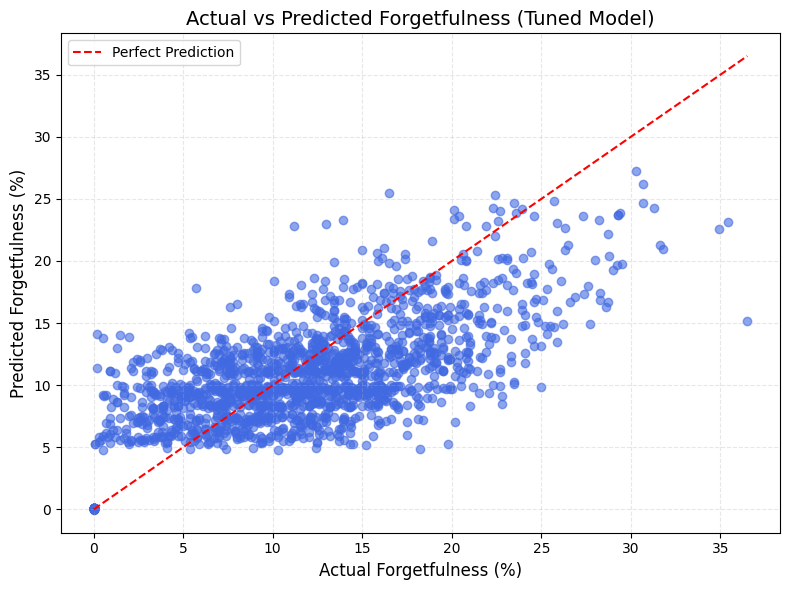

In [187]:
import matplotlib.pyplot as plt
import numpy as np

# Convert predictions and true values back to original scale
y_pred_best_original = np.expm1(y_pred)         # predicted values after inverse log1p
y_test_best_original = np.expm1(y_test)         # actual target values after inverse log1p

# 1. Scatter Plot: Actual vs Predicted (Tuned Model)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_best_original, y_pred_best_original, alpha=0.6, color='royalblue')  # actual vs predicted
plt.plot(
    [y_test_best_original.min(), y_test_best_original.max()],
    [y_test_best_original.min(), y_test_best_original.max()],
    'r--', label="Perfect Prediction"  # reference line
)

# Axis labels and title
plt.xlabel("Actual Forgetfulness (%)", fontsize=12)
plt.ylabel("Predicted Forgetfulness (%)", fontsize=12)
plt.title("Actual vs Predicted Forgetfulness (Tuned Model)", fontsize=14)

# Grid and legend
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


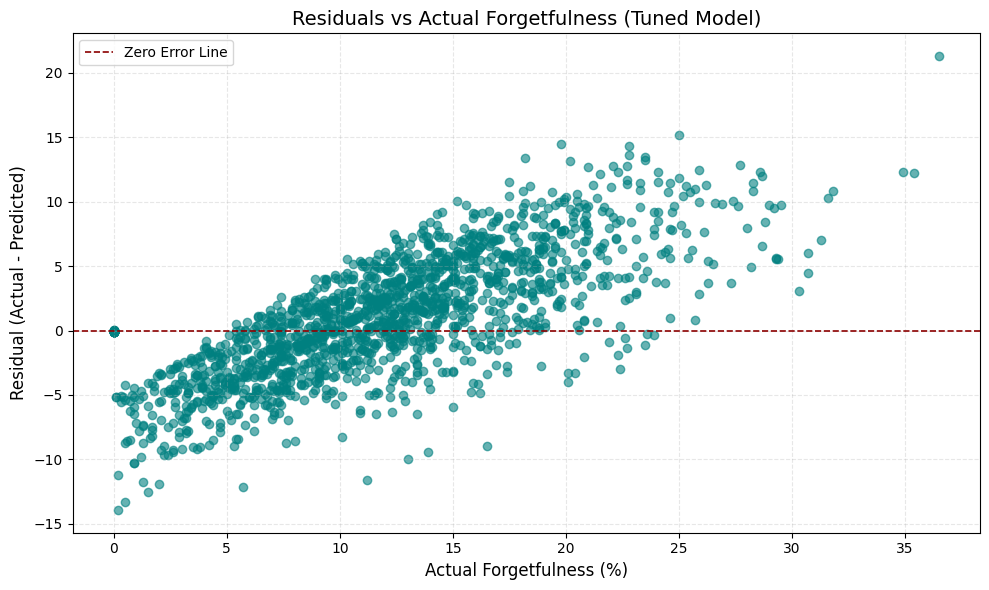

In [188]:
# Calculate residuals for the tuned model
residuals_best = y_test_best_original - y_pred_best_original  # actual - predicted

# Plot residuals vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_best_original, residuals_best, alpha=0.6, color='teal')  # residual scatter plot
plt.axhline(0, color='darkred', linestyle='--', linewidth=1.2, label="Zero Error Line")  # reference line

# Set labels and title
plt.xlabel("Actual Forgetfulness (%)", fontsize=12)
plt.ylabel("Residual (Actual - Predicted)", fontsize=12)
plt.title("Residuals vs Actual Forgetfulness (Tuned Model)", fontsize=14)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [189]:
import joblib  # for saving the trained model

# Save the best XGBoost model after tuning
best_model = grid_search.best_estimator_  # get the best model from grid search
joblib.dump(best_model, "forgetfulness_model_xgb.pkl")  # save model to file

['forgetfulness_model_xgb.pkl']

In [190]:
# Load the model from file
model = joblib.load("forgetfulness_model_xgb.pkl")


## Result After 'tuning'

In [191]:
import joblib
model = joblib.load("forgetfulness_model_xgb.pkl")
print(type(model))

<class 'xgboost.sklearn.XGBRegressor'>


In [192]:
import joblib
import numpy as np

# Step 1: Load the trained model
model = joblib.load("/content/forgetfulness_model_xgb.pkl")  # load the saved XGBoost model

# Step 2: Randomly select sample indices from the test set
n_samples = 5  # number of samples to display
sample_indices = np.random.choice(len(X_test), size=n_samples, replace=False)

# Extract input features and true labels for the selected samples
X_sample = X_test.iloc[sample_indices]
y_true_sample = y_test.iloc[sample_indices]

# Step 3: Predict forgetfulness using the loaded model
y_pred_sample = model.predict(X_sample)

# Step 4: Display the results
print("Sample Predictions vs Actual (Log Scale)\n")
for i in range(n_samples):
    actual = y_true_sample.iloc[i]
    predicted = y_pred_sample[i]
    diff = abs(actual - predicted)

    print(f"   Sample #{i + 1}")
    print(f"   Actual Forgetfulness (log)    : {actual:.4f}")
    print(f"   Predicted Forgetfulness (log) : {predicted:.4f}")
    print(f"   Absolute Difference           : {diff:.4f}\n")


Sample Predictions vs Actual (Log Scale)

   Sample #1
   Actual Forgetfulness (log)    : 2.8154
   Predicted Forgetfulness (log) : 2.6468
   Absolute Difference           : 0.1686

   Sample #2
   Actual Forgetfulness (log)    : 2.9704
   Predicted Forgetfulness (log) : 2.6422
   Absolute Difference           : 0.3282

   Sample #3
   Actual Forgetfulness (log)    : 2.0412
   Predicted Forgetfulness (log) : 2.0363
   Absolute Difference           : 0.0049

   Sample #4
   Actual Forgetfulness (log)    : 2.1518
   Predicted Forgetfulness (log) : 2.5910
   Absolute Difference           : 0.4393

   Sample #5
   Actual Forgetfulness (log)    : 2.3795
   Predicted Forgetfulness (log) : 2.6634
   Absolute Difference           : 0.2839



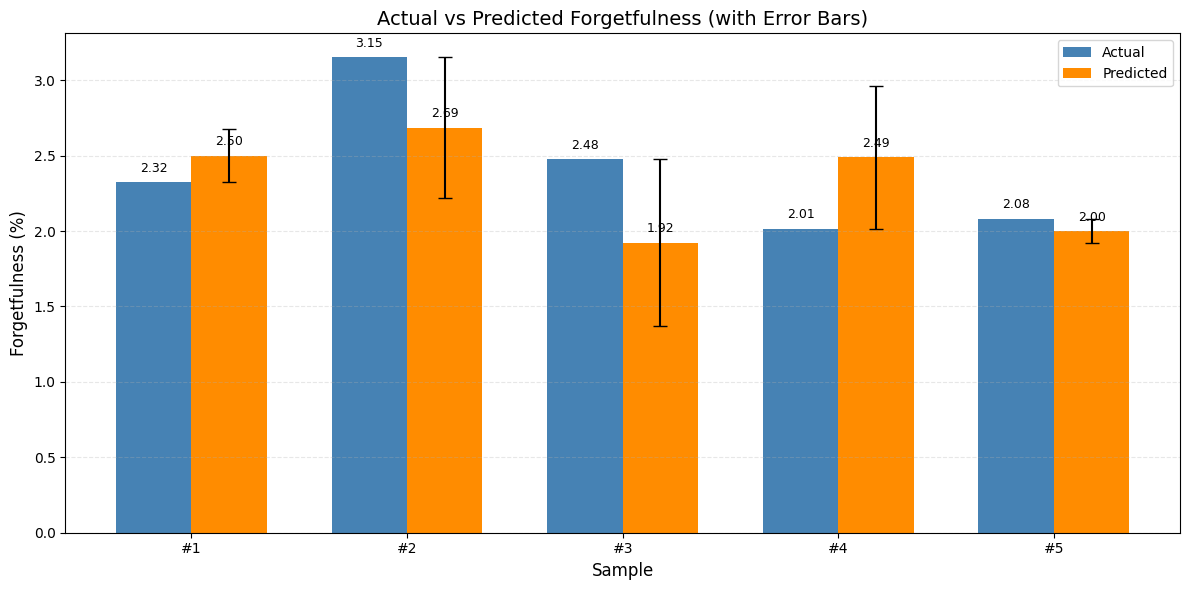

In [195]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample data for visualization
sample_results = pd.DataFrame({
    "Sample": [1, 2, 3, 4, 5],
    "Actual Forgetfulness": [2.3224, 3.1527, 2.4765, 2.0149, 2.0794],
    "Predicted Forgetfulness": [2.4983, 2.6860, 1.9226, 2.4897, 1.9995]
})

# Calculate errors
sample_results["Error"] = sample_results["Actual Forgetfulness"] - sample_results["Predicted Forgetfulness"]
sample_results["Absolute Error"] = sample_results["Error"].abs()

# Set up bar plot
plt.figure(figsize=(12, 6))
x = np.arange(len(sample_results))
bar_width = 0.35

# Create bars for actual and predicted values
bars_actual = plt.bar(
    x - bar_width / 2,
    sample_results["Actual Forgetfulness"],
    width=bar_width,
    label='Actual',
    color='steelblue'
)

bars_pred = plt.bar(
    x + bar_width / 2,
    sample_results["Predicted Forgetfulness"],
    width=bar_width,
    yerr=sample_results["Absolute Error"],
    capsize=5,
    label='Predicted',
    color='darkorange'
)

# Add value labels on top of each bar
for bar in bars_actual + bars_pred:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.05,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=9
    )

# Final formatting
plt.xlabel('Sample', fontsize=12)
plt.ylabel('Forgetfulness (%)', fontsize=12)
plt.title('Actual vs Predicted Forgetfulness (with Error Bars)', fontsize=14)
plt.xticks(ticks=x, labels=[f"#{i}" for i in sample_results["Sample"]])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


In [196]:
# Print summary table
print("\nForgetfulness Prediction Summary:\n")
print(sample_results.to_string(index=False))


Forgetfulness Prediction Summary:

 Sample  Actual Forgetfulness  Predicted Forgetfulness   Error  Absolute Error
      1                2.3224                   2.4983 -0.1759          0.1759
      2                3.1527                   2.6860  0.4667          0.4667
      3                2.4765                   1.9226  0.5539          0.5539
      4                2.0149                   2.4897 -0.4748          0.4748
      5                2.0794                   1.9995  0.0799          0.0799


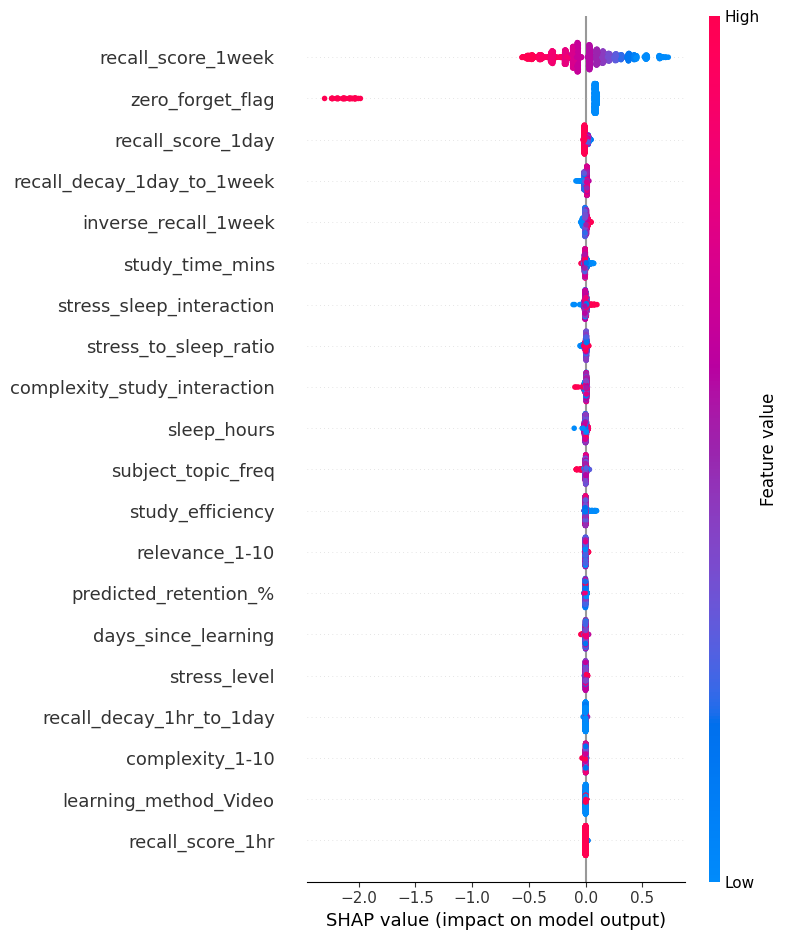

In [197]:
import shap

# Convert to float64 to avoid dtype issues
X_train_float = X_train.astype('float64')
X_test_float = X_test.astype('float64')

# Now pass this to SHAP
explainer = shap.Explainer(best_model, X_train_float)
shap_values = explainer(X_test_float)

# Plot
shap.summary_plot(shap_values, X_test_float)

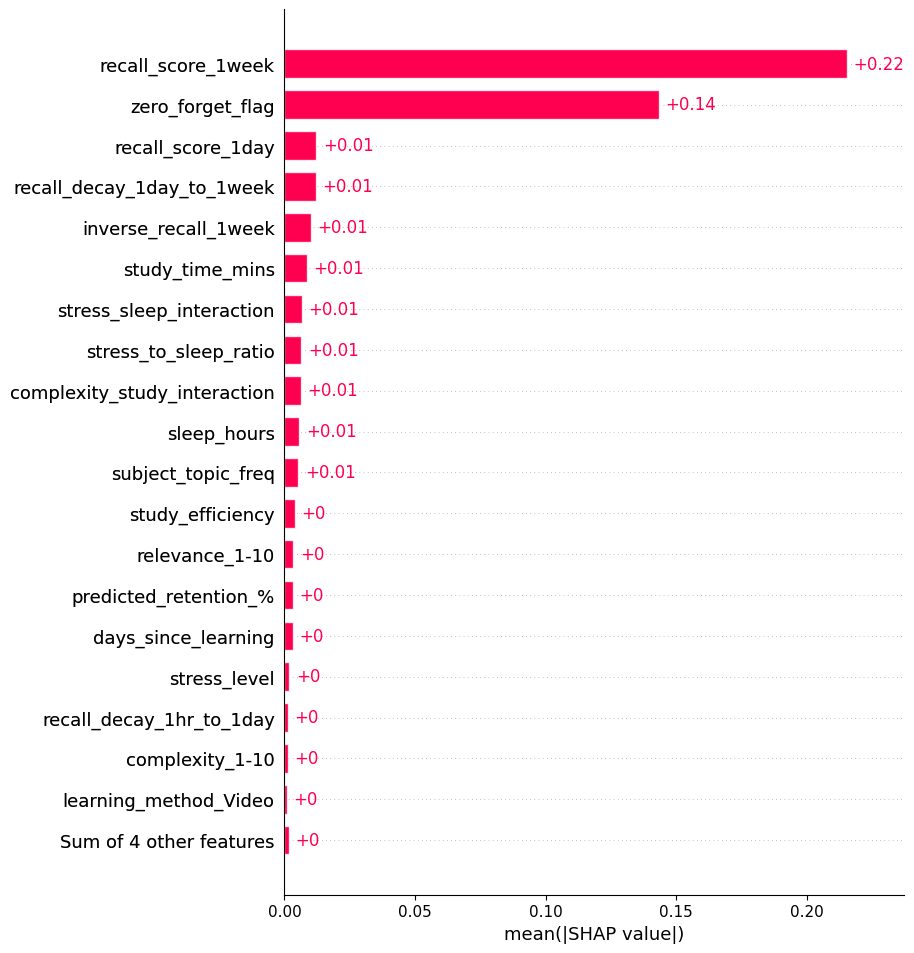

In [198]:
import shap
explainer = shap.Explainer(best_model, X_train.astype('float64'))
shap_values = explainer(X_test.astype('float64'))
shap.plots.bar(shap_values, max_display=20)